CPU times: user 167 ms, sys: 18.5 ms, total: 185 ms
Wall time: 263 ms
CPU times: user 202 ms, sys: 0 ns, total: 202 ms
Wall time: 201 ms


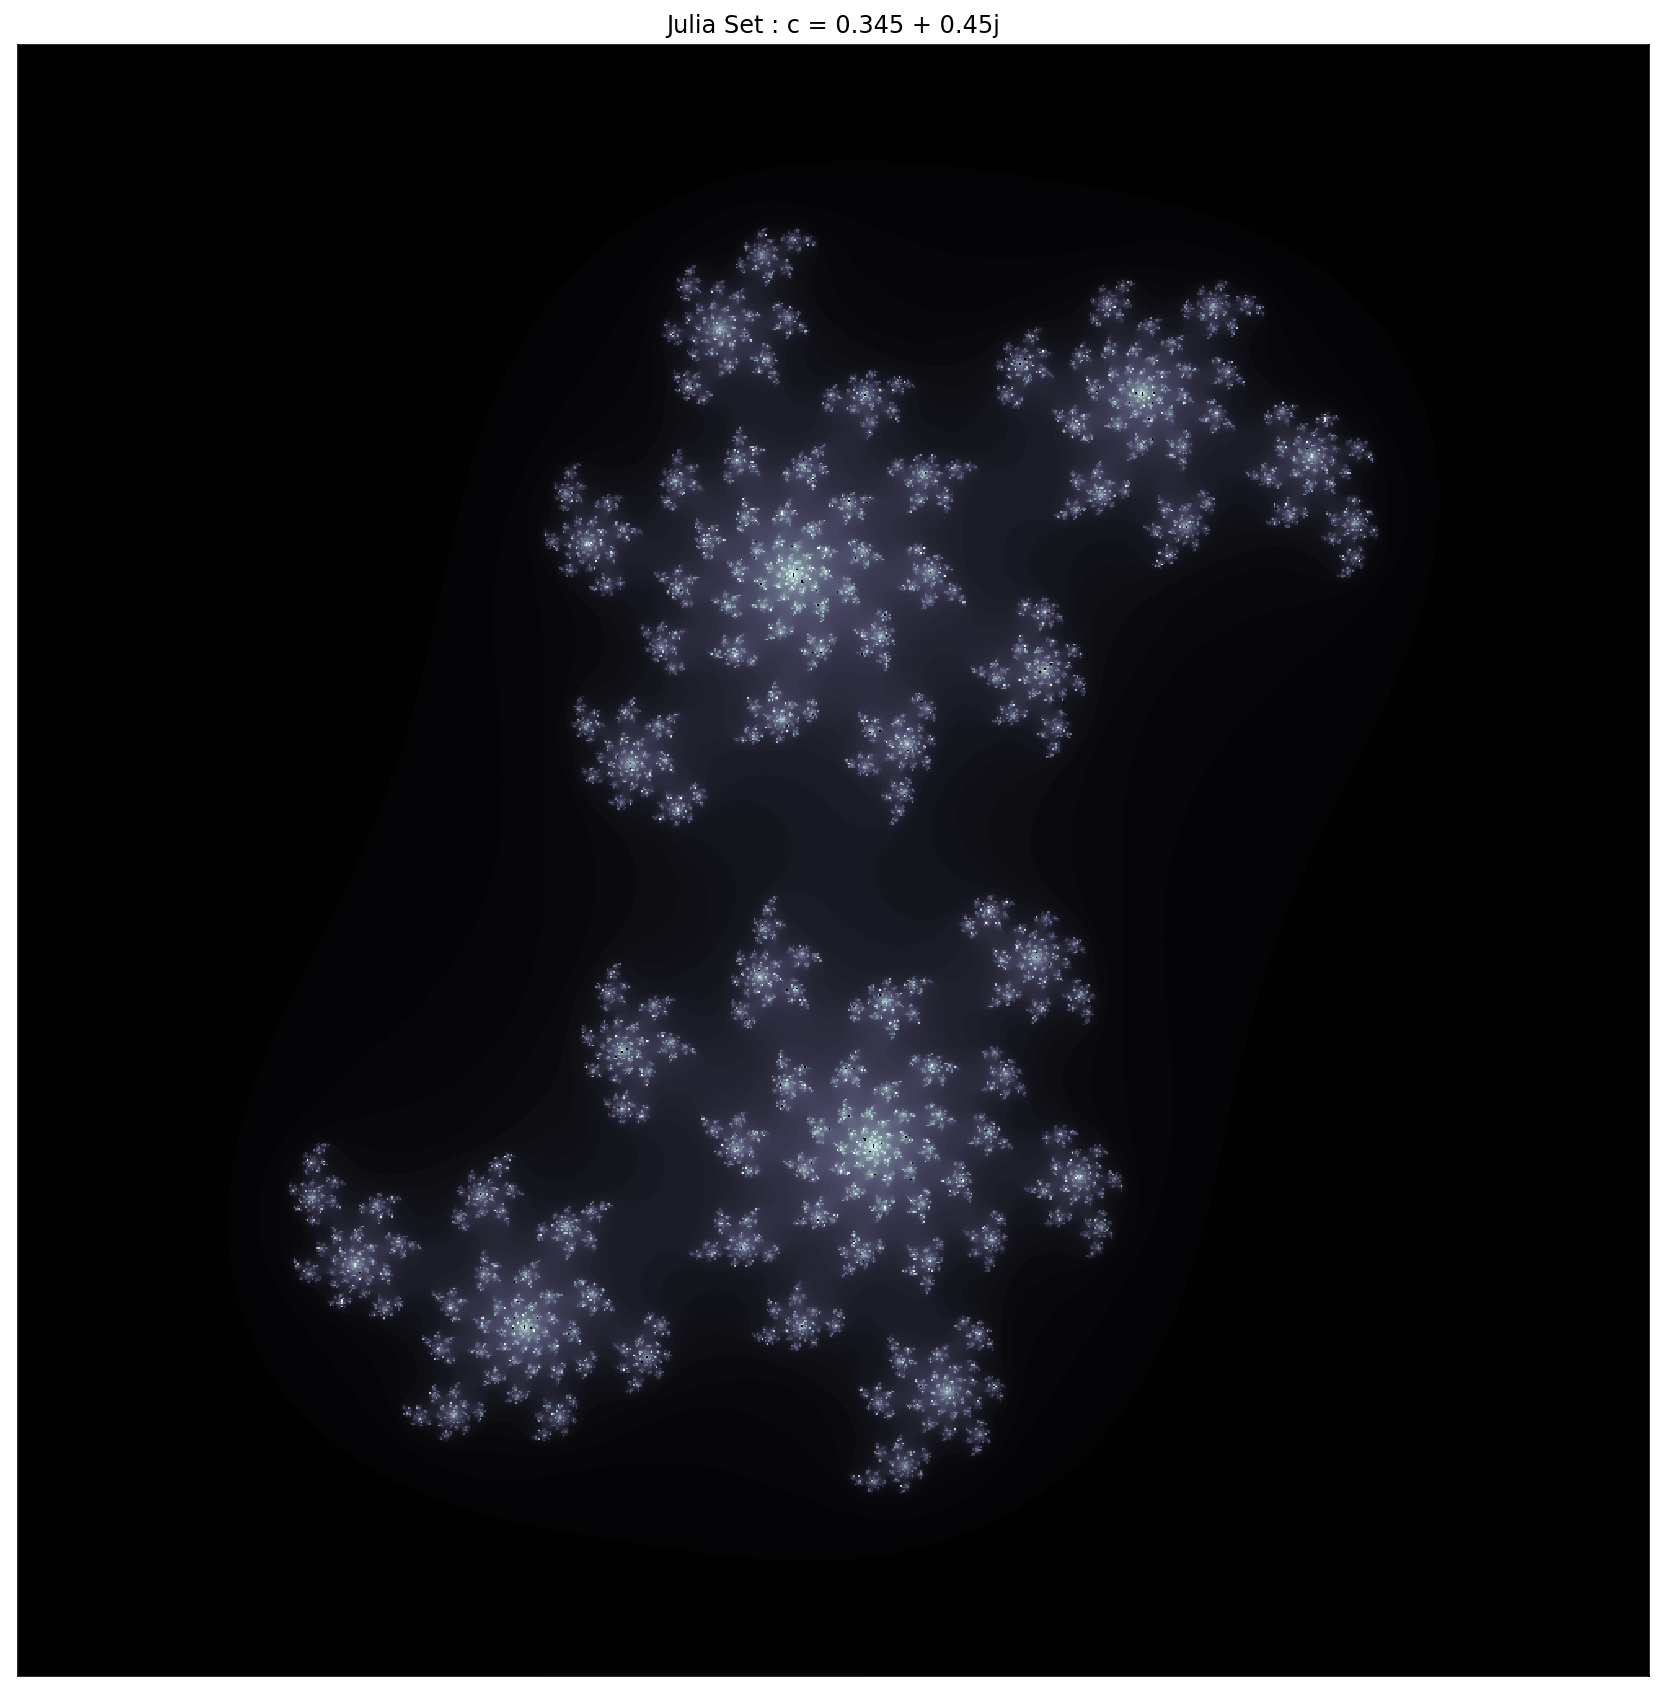

In [2]:
import numpy as np
import numba as nb  #uncomment for numba
import matplotlib.pyplot as plt
%matplotlib inline

def julia(c):
    #@np.vectorize  #comment for numba
    @nb.vectorize #uncomment for numba
    def j(z):
        for n in range(100):
            z = z**2 + c
            if abs(z) > 2:
                return n
        return 0
    return j

j = julia(0.345 + 0.45j)

@nb.jit  #uncomment for numba
def cplane(min=-1.5, max=1.5, points=1000):
    r = np.linspace(-1.5, 1.5, points)
    x, y = np.meshgrid(r,r)
    z = x + y * 1j
    return z

%time z = cplane()
%time jset = j(z)

plt.figure(1, (20,15))
plt.imshow(jset, cmap=plt.cm.bone)
plt.xticks([])
plt.yticks([])
plt.title("Julia Set : c = 0.345 + 0.45j")
plt.show()